--2023-03-19 19:10:56--  https://drive.google.com/uc?id=1Mk4u2ulet7XtkaiVB3Im34QxSchMSskt
Resolving drive.google.com (drive.google.com)... 142.251.16.100, 142.251.16.138, 142.251.16.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/paqn887q0rmsflgsaunqo0fqb9ak9ee6/1679253000000/03208822316664015620/*/1Mk4u2ulet7XtkaiVB3Im34QxSchMSskt?uuid=a030ae13-1f1a-41e2-93f6-711c4bf7cd57 [following]
--2023-03-19 19:10:56--  https://doc-00-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/paqn887q0rmsflgsaunqo0fqb9ak9ee6/1679253000000/03208822316664015620/*/1Mk4u2ulet7XtkaiVB3Im34QxSchMSskt?uuid=a030ae13-1f1a-41e2-93f6-711c4bf7cd57
Resolving doc-00-24-docs.googleusercontent.com (doc-00-24-docs.googleusercontent.com)... 142.251.111.132, 2607:f8b0:4004:c19::84
Connecting to doc-0

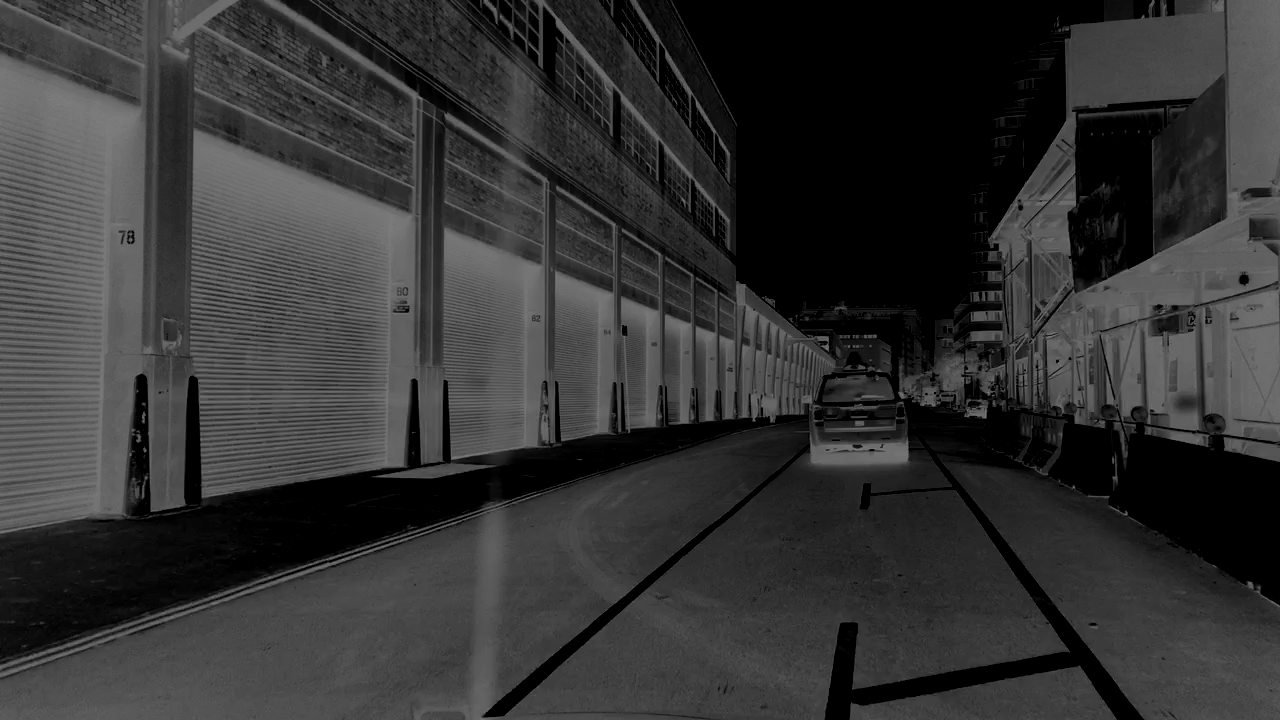

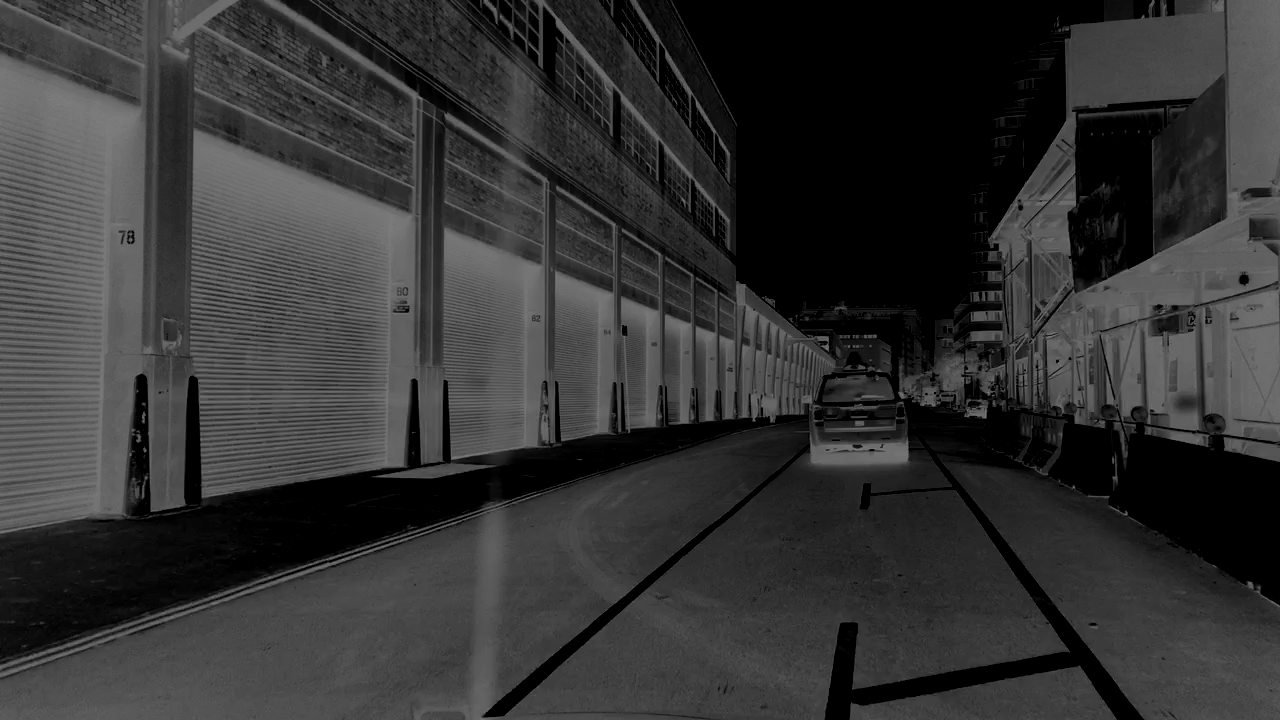

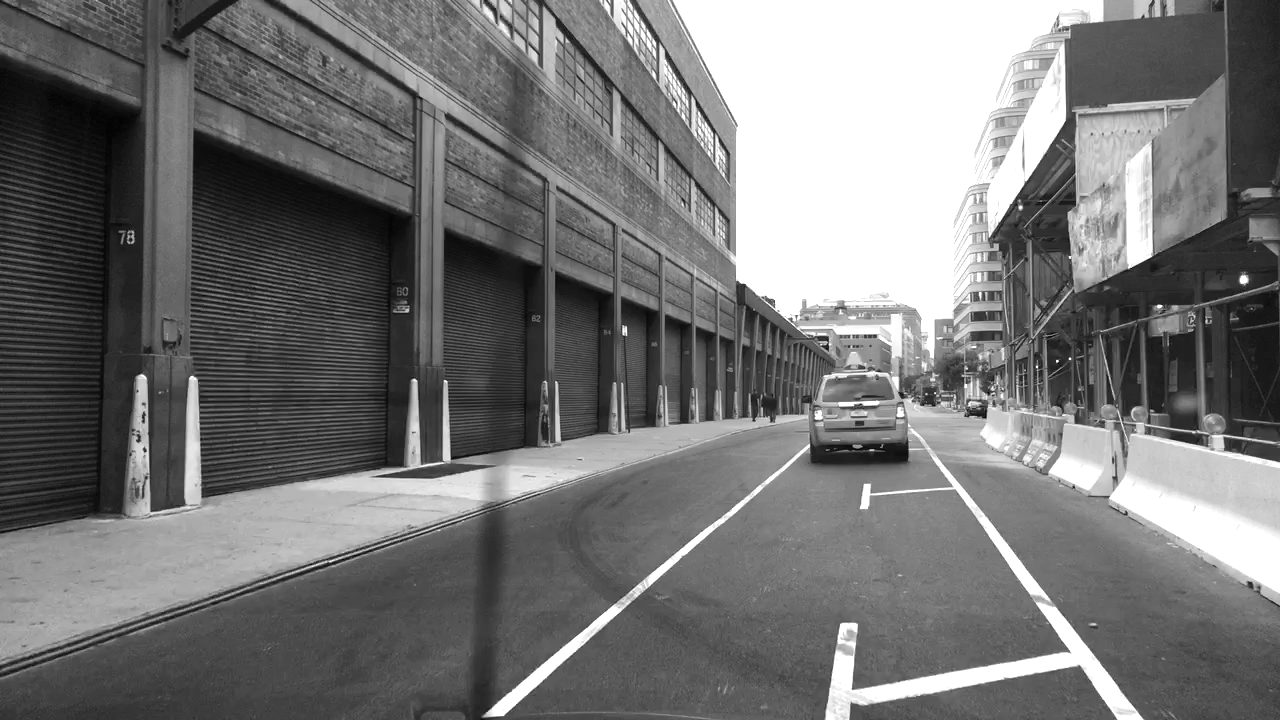

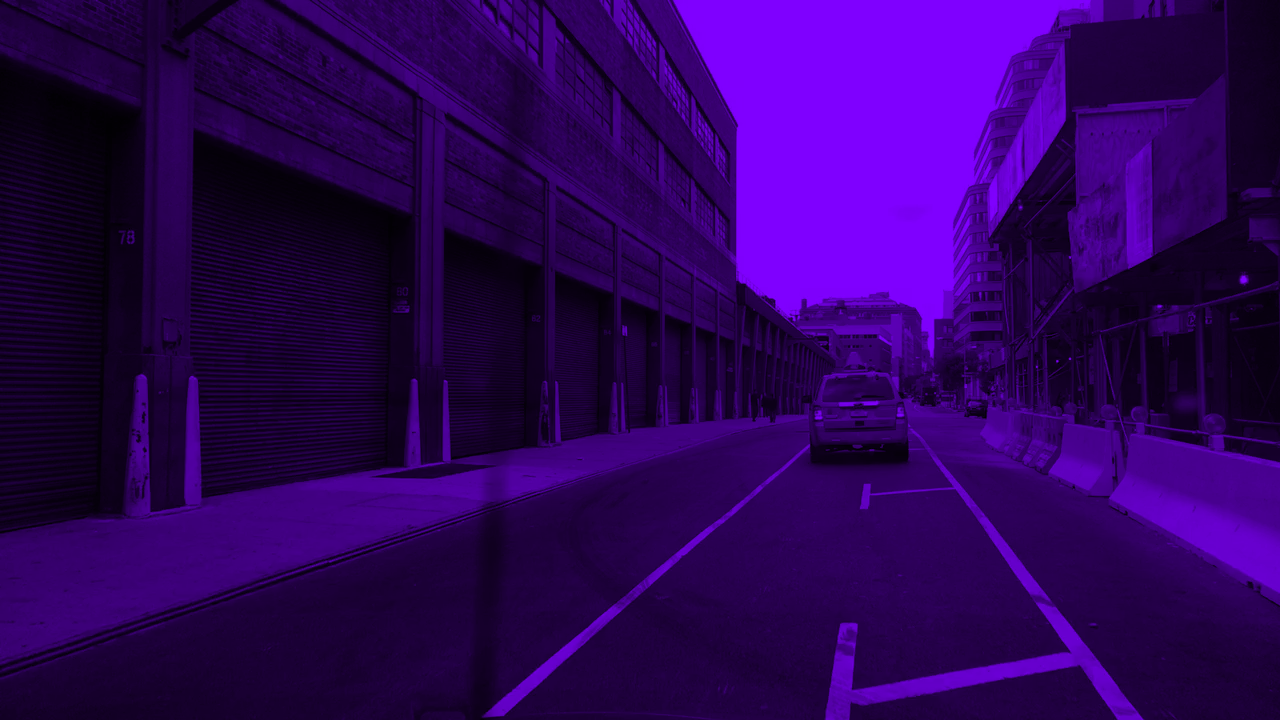

In [ ]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow
# DO NOT USE ANY BUILT-IN CONV. FUNCTIONS 

def hsv_to_rgb(h, s, v):
    i = int(h*6.) # XXX assume int() truncates!
    f = (h*6.)-i; p,q,t = v*(1.-s), v*(1.-s*f), v*(1.-s*(1.-f)); i%=6
    if i == 0: return (v*255, t*255, p*255)
    if i == 1: return (q*255, v*255, p*255)
    if i == 2: return (p*255, v*255, t*255)
    if i == 3: return (p*255, q*255, v*255)
    if i == 4: return (t*255, p*255, v*255)
    if i == 5: return (v*255, p*255, q*255)

def gaussian(sigma, radius):
    """
    Compute a Gaussian convolution kernel.
    """
    kernel_size = 2*radius+1
    gaussian_kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
      for j in range(kernel_size):
        x = i - radius
        y = j - radius
        gaussian_kernel[i,j] = math.exp(-(x**2 + y**2)/(2**sigma**2))

    gaussian_kernel = gaussian_kernel/np.sum(gaussian_kernel)
    return gaussian_kernel


def gaussian_1D(sigma, radius):
    """
    Compute a 1-D Gaussian convolution kernel.
    """
    kernel_size = 2*radius+1
    gaussian_kernel = np.zeros(kenel_size)
    for i in range(kernel_size):
      x = i - radius
      gaussian_kernel[i] = math.exp(-(x**2)/(2*sigma**2))
    gaussian_kernel = gaussian_kernel/np.sum(gaussian_kernel)
    return gaussian_kernel


def generalized_sobel(ksize):
  # write sobel filter
  sobel_kernel = np.zeros((ksize, ksize))
  center = ksize/2
  for i in range(ksize):
    for j in range(ksize):
      x = i - center
      y = j - center
      sobel_kernel[i,j] = x/(x**2 + y**2 + 0.00001)
  return sobel_kernel

def my_conv(img, kernel):
  # write your convolution function
  kernel_size = kernel.shape[0]
  radius = kernel_size//2
  h,w = img.shape
  result = np.zeros((h,w))
  for i in range(radius, h-radius):
    for j in range(radius, w-radius):
      sum_ = 0
      for k in range(kernel_size):
        for l in range(kernel_size):
          sum_ += kernel[k,l]*img[i+k-radius, j+l-radius]
      result[i,j] = sum_
  return result

def main():
  !wget -O image.png https://drive.google.com/uc?id=1Mk4u2ulet7XtkaiVB3Im34QxSchMSskt&export=download
  ksize = 1
  sx = generalized_sobel(ksize)
  sy = sx.transpose()

  # read image
  img = cv2.imread('image.png')
  h,w,c = np.shape(img)
  if c == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  gx = my_conv(img, sx); 
  gy = my_conv(img, sy); 
  gradient_strength = np.sqrt(gx*gx + gy*gy)
  orientation = np.arctan(gy/(gx+0.00001))
  gx = (gx + 127)
  gy = (gy + 127)

  orientation_color = np.zeros((h,w,3))
  
  for i in range(0,h):
    for j in range(0,w):
      orientation_color[i,j,::-1] = hsv_to_rgb((orientation[i,j]+np.pi/2)/(np.pi), 1, gradient_strength[i,j]/np.max(gradient_strength))

  cv2_imshow(gx)
  cv2_imshow(gy)
  cv2_imshow(gradient_strength)
  cv2_imshow(orientation_color)
  # write images to a file

main()